# Naive Bayes Notebook

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

## Testing for initial hypothesis LeaveOrNot ~ Gender + EverBenched + PaymentTier

In [39]:
employee = pd.read_csv("../data/employee_cleaned.csv")

## Encoding Categories via panda dummy variables

In [40]:
employee = pd.get_dummies(employee, columns=["Gender", "EverBenched","PaymentTier"])
employee = employee.drop(columns=['Age', 'Education', 'ExperienceInCurrentDomain','City','JoiningYear'])

## Partition Data prior to training model

In [41]:
X = employee.loc[:, employee.columns != 'LeaveOrNot']
y = employee.loc[:, employee.columns == 'LeaveOrNot']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=7)

## Running Naive Bayes Algorithm

In [43]:
nb = MultinomialNB().fit(X_train, y_train.values.ravel())

In [44]:
y_pred = nb.predict(X_test)

## Evaluating Naive Bayes Predictions

In [45]:
ypred = pd.crosstab(y_test['LeaveOrNot'], y_pred, rownames = ['Actual'], colnames = ['Predicted'])
ypred['Total'] = ypred.sum(axis=1); ypred.loc['Total'] = ypred.sum()
print(ypred)

Predicted    0    1  Total
Actual                    
0          598   52    650
1          350  106    456
Total      948  158   1106


In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6365280289330922
Precision: 0.6708860759493671
Recall: 0.2324561403508772


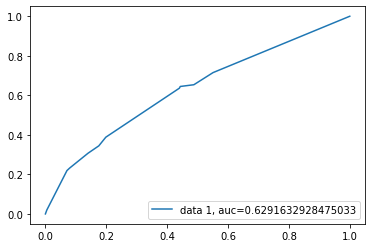

In [47]:
y_pred_proba = nb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Testing for alt hypothesis LeaveOrNot ~ City + EverBenched + JoiningYear

In [48]:
#Resetting Dataframe
employee = pd.read_csv("../data/employee_cleaned.csv")

## Encoding Categories via panda dummy variables

In [49]:
employee = pd.get_dummies(employee, columns=["City","Gender","JoiningYear"])
employee = employee.drop(columns = ['Age','Education','PaymentTier','EverBenched','ExperienceInCurrentDomain'])

## Partition Data prior to training model

In [50]:
X = employee.loc[:, employee.columns != 'LeaveOrNot']
y = employee.loc[:, employee.columns == 'LeaveOrNot']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=7)

## Running Naive Bayes Algorithm

In [52]:
nb = MultinomialNB().fit(X_train, y_train.values.ravel())

In [53]:
y_pred = nb.predict(X_test)

## Evaluating Naive Bayes Predictions

In [54]:
ypred = pd.crosstab(y_test['LeaveOrNot'], y_pred, rownames = ['Actual'], colnames = ['Predicted'])
ypred['Total'] = ypred.sum(axis=1); ypred.loc['Total'] = ypred.sum()
print(ypred)

Predicted    0    1  Total
Actual                    
0          620   30    650
1          279  177    456
Total      899  207   1106


In [55]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.720614828209765
Precision: 0.855072463768116
Recall: 0.3881578947368421


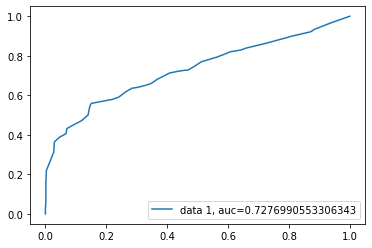

In [56]:
y_pred_proba = nb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()